C:\Users\chris\AppData\Local\Temp\ipykernel_17348\3279685013.py:63: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/10
781/781 [==============================] - 1283s 2s/step - loss: 1.6756 - accuracy: 0.4579 - val_loss: 1.1024 - val_accuracy: 0.6225
Epoch 2/10
781/781 [==============================] - 1239s 2s/step - loss: 1.1393 - accuracy: 0.6003 - val_loss: 0.9277 - val_accuracy: 0.6792
Epoch 3/10
781/781 [==============================] - 1237s 2s/step - loss: 0.9880 - accuracy: 0.6524 - val_loss: 0.9791 - val_accuracy: 0.6776
Epoch 4/10
781/781 [==============================] - 1241s 2s/step - loss: 0.9191 - accuracy: 0.6749 - val_loss: 0.8378 - val_accuracy: 0.7247
Epoch 5/10
781/781 [==============================] - 1287s 2s/step - loss: 0.8644 - accuracy: 0.6982 - val_loss: 0.8132 - val_accuracy: 0.7271
Epoch 6/10
781/781 [==============================] - 1285s 2s/step - loss: 0.8225 - accuracy: 0.7133 - val_loss: 0.7861 - val_accuracy: 0.7442
Epoch 7/10
781/781 [==============================] - 1291s 2s/step - loss: 0.7917 - accuracy: 0.7244 - val_loss: 0.8741 - val_accuracy:

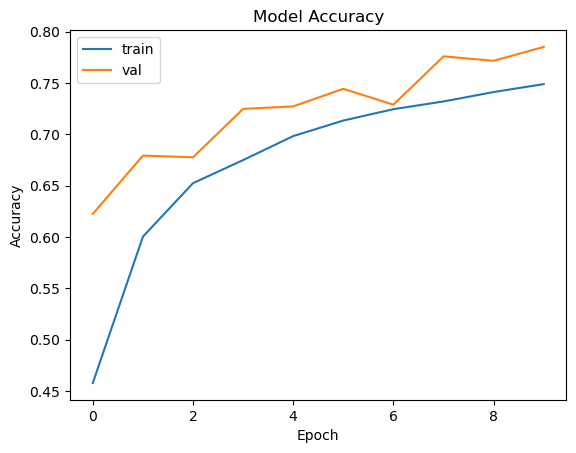

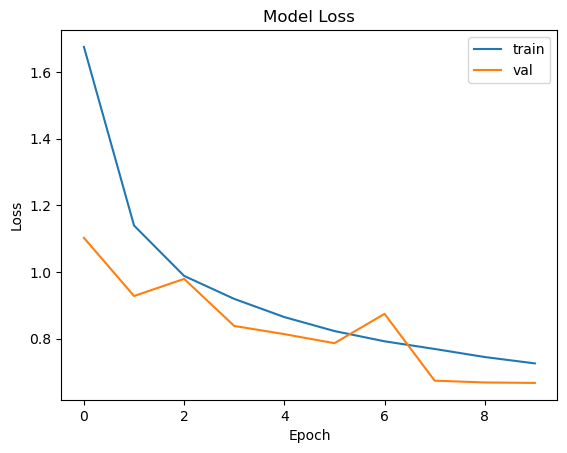

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = tf.keras.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Add the fourth convolutional layer
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Add the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the data-augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Train the model with data-augmentation
batch_size = 64
epochs = 10
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test))
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Save the model
model.save('dsc650/assignments/assignment06/results/Assignment 6.2.b/cifar10_model.h5')

# Save the predictions
y_pred = model.predict(x_test)
np.save('dsc650/assignments/assignment06/results/Assignment 6.2.b/cifar10_predictions.npy', y_pred)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')

plt.savefig('dsc650/assignments/assignment06/results/Assignment 6.2.b/accuracy_plot.png')

plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('dsc650/assignments/assignment06/results/Assignment 6.2.b/loss_plot.png')
plt.show()